<h1><center> Predicting Ice Cream Revenue for Frosty Forecasts Ice Cream Co.</center></h1>

<p align="justify">This project aims to enhance the machine learning tool for Frosty Forecasts Ice Cream Co., expanding its capabilities to predict daily revenue not only based on outside temperature but also incorporating seasonal trends. By utilizing a comprehensive dataset that includes historical data on temperature, revenue, and additional seasonal indicators such as month, day of the week, and holidays, the enhanced model will employ linear regression and gradient descent to model these complex relationships. The primary goal is to refine Frosty Forecasts Ice Cream Co.'s decision-making process regarding the deployment of ice cream trucks, optimizing operations to target the most profitable days more accurately. This refined predictive capability aims to boost operational efficiency, reduce costs, and increase revenue more effectively, thereby supporting the company’s broader success in a dynamic market environment.</p>

<h2><center>Exploratory Data Analysis</center></h2>

In [379]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.dates as mdates

class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'

df = pd.read_csv('./data/ice_cream_truck_revenue_with_seasonality.csv')
df['date'] = pd.to_datetime(df['date'])
X = df.drop('revenue', axis=1)
y = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

df.describe()

,date,temperature,revenue,month,day_of_week,day_of_year,week_of_year,rolling_temp_avg,temp_difference,month_sin,month_cos,day_of_week_sin,day_of_week_cos
count,500,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,2024-09-06 12:00:00,55.246775,593.572795,5.508000,2.988000,152.412000,22.072000,55.046160,0.068680,0.205260,0.026712,0.003513,0.002802
min,2024-01-01 00:00:00,21.162805,221.861047,1.000000,0.000000,1.000000,1.000000,26.690000,-18.730000,-1.000000,-1.000000,-0.974900,-0.901000
25%,2024-05-04 18:00:00,39.550587,472.456717,3.000000,1.000000,63.000000,9.000000,38.175000,-5.460000,-0.500000,-0.500000,-0.781800,-0.901000
50%,2024-09-06 12:00:00,53.801349,585.582164,5.000000,3.000000,125.500000,18.000000,53.810000,-0.135000,0.500000,-0.000000,0.000000,-0.222500
75%,2025-01-09 06:00:00,70.335125,713.205099,8.000000,5.000000,241.250000,35.000000,69.982500,6.142500,0.866000,0.500000,0.781800,0.623500
max,2025-05-14 00:00:00,92.446368,949.425098,12.000000,6.000000,366.000000,52.000000,88.800000,23.210000,1.000000,1.000000,0.974900,1.000000
std,NaN,18.280119,154.752583,3.459172,2.002968,105.992751,15.015917,17.422522,8.521043,0.703806,0.680955,0.707875,0.707734


<h3>Histogram Analysis of Temperature and Revenue Data</h3>

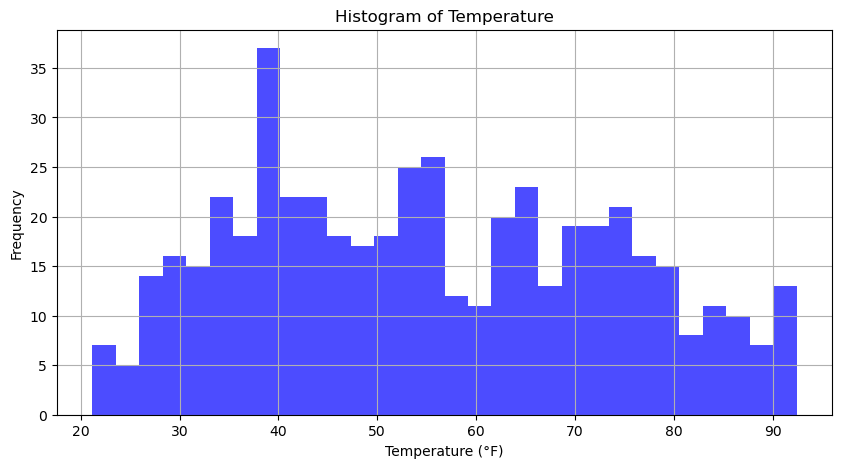

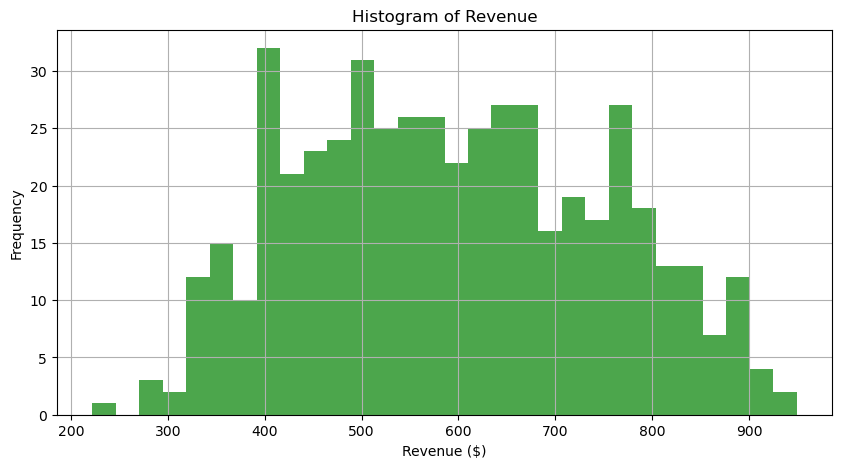

In [381]:
# Plot histogram for Temperature
plt.figure(figsize=(10, 5))
plt.hist(df['temperature'], bins=30, color='blue', alpha=0.7)
plt.title('Histogram of Temperature')
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot histogram for Revenue
plt.figure(figsize=(10, 5))
plt.hist(df['revenue'], bins=30, color='green', alpha=0.7)
plt.title('Histogram of Revenue')
plt.xlabel('Revenue ($)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

<p align="justify">The histograms above provide a visual representation of the distribution of temperatures and revenues for the ice cream truck business, which is crucial for understanding the factors influencing sales. The temperature histogram helps identify common weather conditions, potentially indicating days with higher sales volumes, while the revenue histogram reveals the sales figures' spread over the observed period. Analyzing these distributions assists in forecasting sales and strategizing business operations, highlighting the variability and central tendencies that are vital for predictive modeling and maximizing profitability.</p>

<h3>Line Graph Analysis of Temperature and Revenue Trends Over Time</h3>

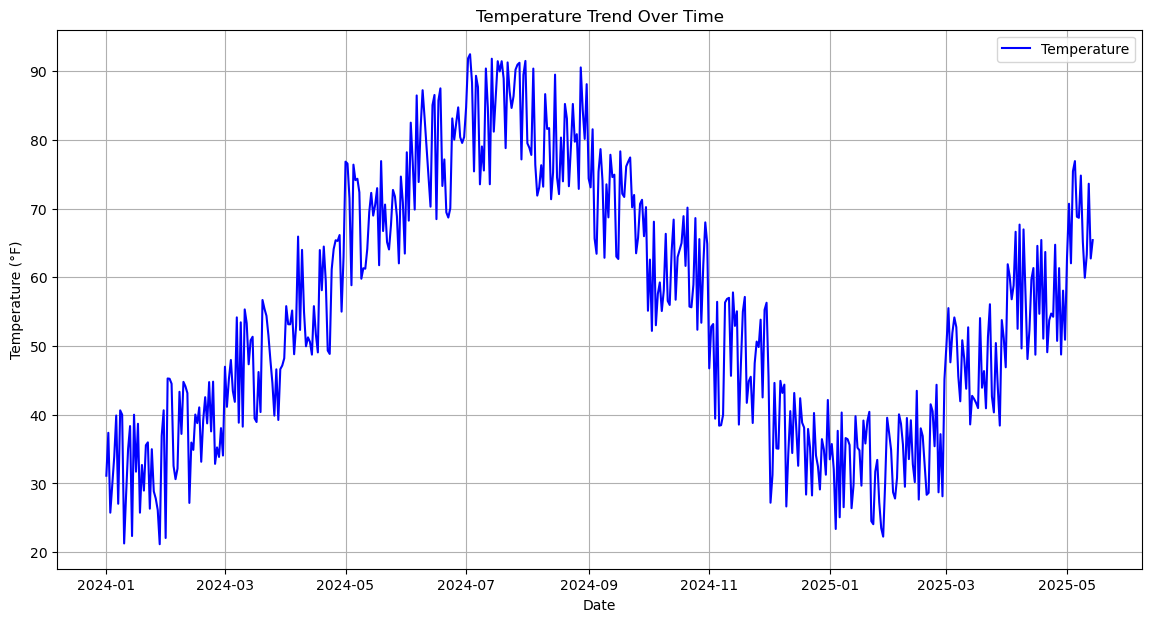

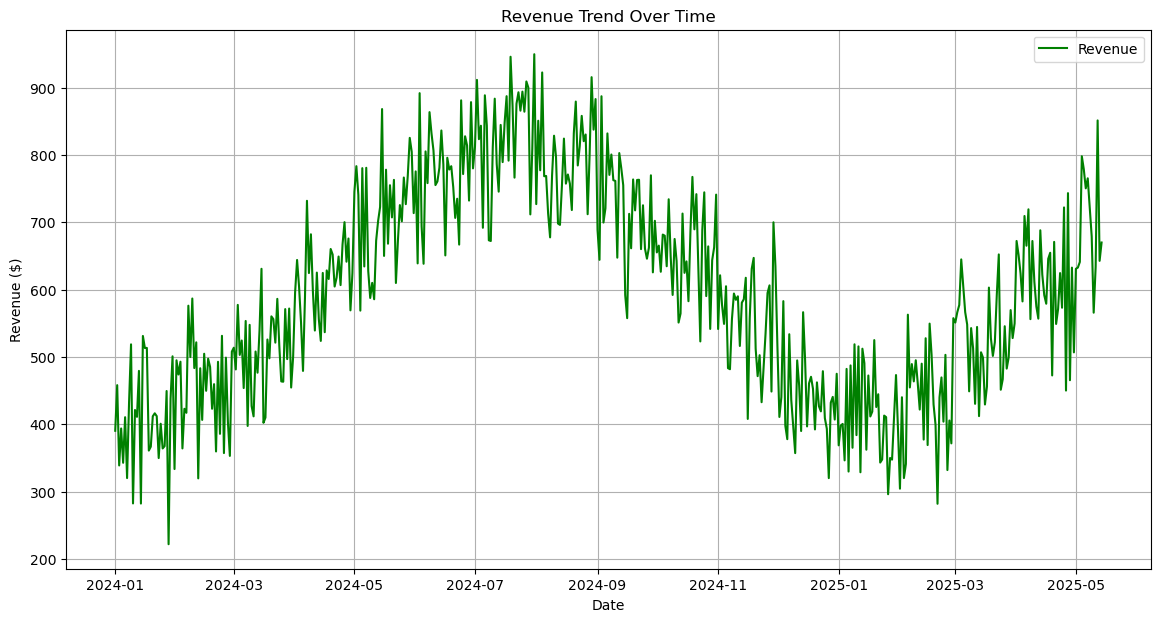

In [384]:
# Plot line graph for Temperature vs. Date
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['temperature'], color='blue', label='Temperature')
plt.title('Temperature Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Temperature (°F)')
plt.grid(True)
plt.legend()
plt.show()

# Plot line graph for Revenue vs. Date
plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['revenue'], color='green', label='Revenue')
plt.title('Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.grid(True)
plt.legend()
plt.show()

<p align="justify">The line graphs above provide a detailed view of how temperature and revenue fluctuate throughout the observation period. The temperature trend line helps identify periods with significant warmth that likely correlate with increased ice cream sales. Observing these patterns allows us to predict potential spikes in demand based on seasonal temperature changes. Conversely, the revenue trend line directly illustrates the sales performance over time, highlighting peak periods, possible sales slumps, and any unexpected fluctuations. Together, these visualizations are crucial for assessing the temporal dynamics of the business, offering insights into how external conditions like weather and seasonality affect sales. This analysis supports strategic planning and forecasting by pinpointing optimal times for resource allocation and promotional efforts, ultimately aiming to enhance profitability and operational efficiency.</p>

<h3>Heatmap Analysis of Feature Correlations</h3>

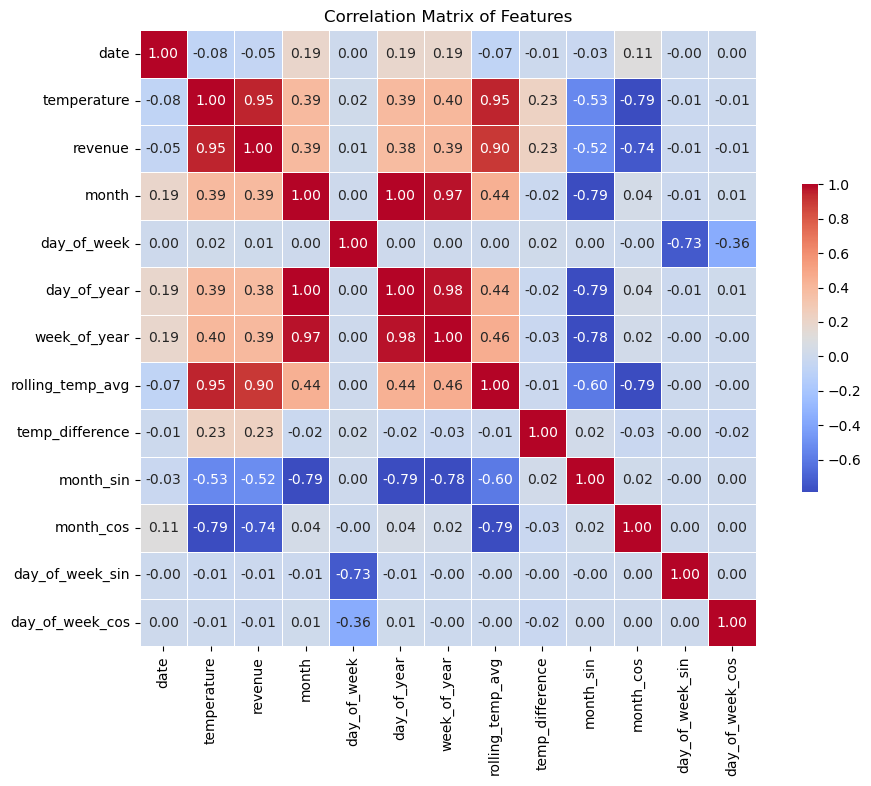

In [387]:
# Calculate the correlation matrix
corr = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 8))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Add title
plt.title('Correlation Matrix of Features')

# Show the plot
plt.show()

<p align="justify">The heatmap displayed above provides a visual representation of the correlation coefficients between all pairs of features within our dataset. Each cell in the heatmap shows the correlation value between two features, where the color intensity reflects the strength and the sign (positive or negative) of the correlation. Positive correlations are shown in warmer tones (red), indicating that as one feature increases, the other also tends to increase. Conversely, cooler tones (blue) denote negative correlations, suggesting that as one feature increases, the other decreases.

This analysis is crucial for identifying relationships that can influence model performance and data interpretation. For instance, a high positive correlation between temperature and revenue supports our hypothesis that warmer days lead to higher ice cream sales. On the other hand, identifying highly correlated independent features is important for avoiding multicollinearity in regression models, which can distort the estimated coefficients. By understanding these relationships, we can make informed decisions about feature selection and engineering to improve model accuracy and reliability.</p>

<h2><center>Linear Regression</center></h2>

In [390]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train.drop('date', axis=1), y_train)  # Ensure to drop non-numeric columns like 'date'

# Make predictions on both training and testing sets
train_preds = model.predict(X_train.drop('date', axis=1))
test_preds = model.predict(X_test.drop('date', axis=1))

<h3>Scatter Plot Analysis: Actual vs. Predicted Revenue</h3>

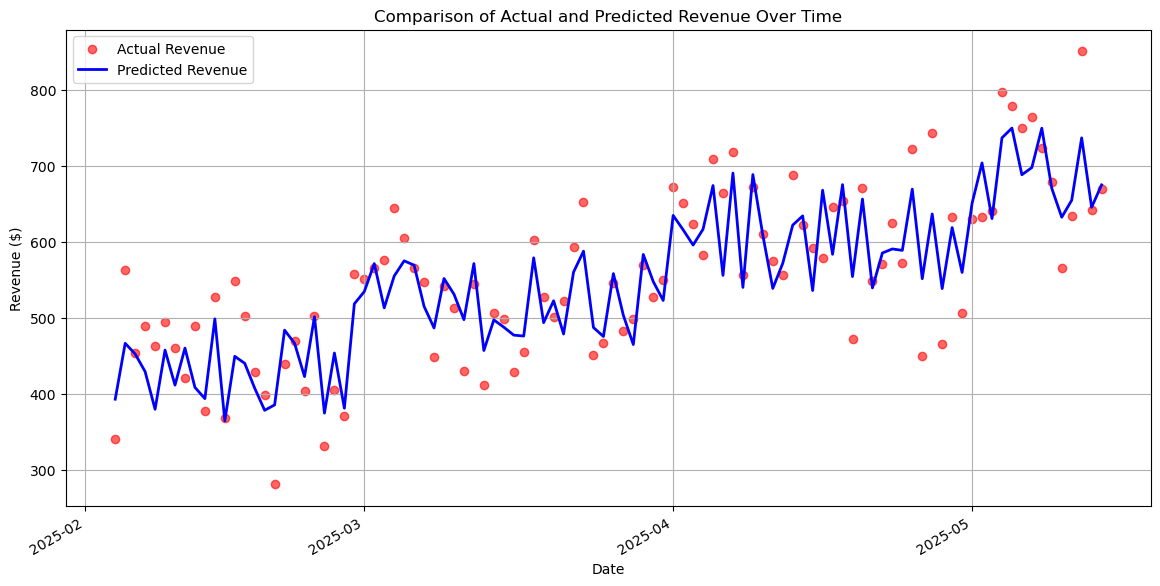

In [392]:
# Create a scatter plot of the actual values
plt.figure(figsize=(14, 7))
plt.scatter(X_test['date'], y_test, color='red', label='Actual Revenue', alpha=0.6)

# Create a line plot for the predicted values
plt.plot(X_test['date'], test_preds, color='blue', linewidth=2, label='Predicted Revenue')

# Formatting the plot
plt.title('Comparison of Actual and Predicted Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Revenue ($)')
plt.legend()
plt.grid(True)

# Improve readability of the x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gcf().autofmt_xdate()  # Rotation

plt.show()

<p align="justify">This scatter plot contrasts actual revenues against predicted revenues over time, highlighting the model’s effectiveness and pinpointing outliers. The prediction line, meant to mirror the actual revenue trajectory, serves as a benchmark for assessing model accuracy; closeness of this line to the actual data points indicates robust performance. Significant deviations, or outliers, suggest areas where the model may falter, potentially due to unaccounted variables or incomplete feature representation. Analyzing these discrepancies helps refine the predictive capabilities of the model, ensuring better alignment with real-world data and enhancing decision-making processes for strategic business operations.</p>

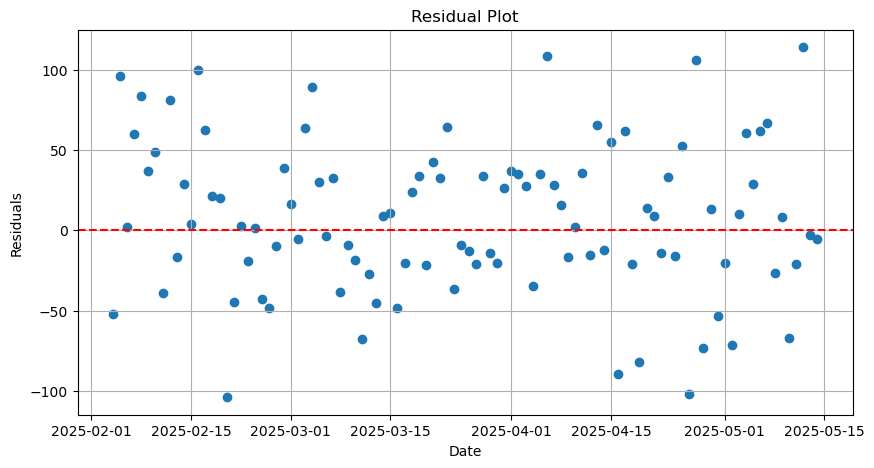

In [394]:
residuals = y_test - test_preds
plt.figure(figsize=(10, 5))
plt.scatter(X_test['date'], residuals)
plt.title('Residual Plot')
plt.xlabel('Date')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.grid(True)
plt.show()

<p align="justify">
    The scatterplot above helps to assess the quality of the regression model by checking for patterns in the residuals. The residuals are randomly scattered around the horizontal line, indicating that the model's errors are randomly distributed and that there are no systematic patterns left unexplained by the model.
</p>

In [396]:
# Evaluate the model
train_rmse = root_mean_squared_error(y_train, train_preds)
test_rmse = root_mean_squared_error(y_test, test_preds)
train_r2 = r2_score(y_train, train_preds)
test_r2 = r2_score(y_test, test_preds)
scores = cross_val_score(model, X_train.drop('date', axis=1), y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R-squared: {train_r2:.2f}")
print(f"Testing R-squared: {test_r2:.2f}")
print("Cross-validated RMSE: ", np.sqrt(-scores.mean()))

Training RMSE: 48.37
Testing RMSE: 47.77
Training R-squared: 0.91
Testing R-squared: 0.81
Cross-validated RMSE:  51.9359888608747


<h3>Parameter Tuning</h3>

In [398]:
# Use a grid search to find best estimator
parameters = {'fit_intercept':[True,False]}
grid_search = GridSearchCV(model, parameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train.drop('date', axis=1), y_train)
best_model = grid_search.best_estimator_

In [399]:
# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Output the best score
best_score = np.sqrt(-grid_search.best_score_)
print("Best cross-validated RMSE using the best parameters: {:.2f}".format(best_score))

# Apply the best model to make predictions
best_model = grid_search.best_estimator_

# Make predictions using the best model
best_train_preds = best_model.predict(X_train.drop('date', axis=1))
best_test_preds = best_model.predict(X_test.drop('date', axis=1))

# Evaluate the best model
best_train_rmse = root_mean_squared_error(y_train, best_train_preds)
best_test_rmse = root_mean_squared_error(y_test, best_test_preds)
best_train_r2 = r2_score(y_train, best_train_preds)
best_test_r2 = r2_score(y_test, best_test_preds)

Best parameters found:  {'fit_intercept': True}
Best cross-validated RMSE using the best parameters: 51.94


<h3>Visualization of Feature Importance in Linear Regression</h3>

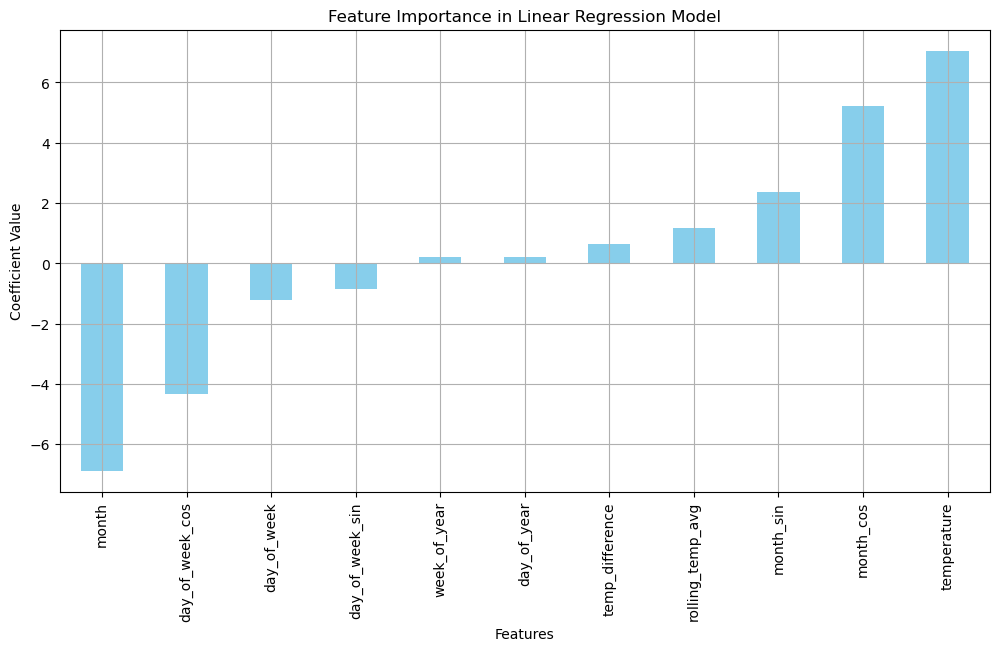

In [401]:
# Calculate feature importance from the model coefficients
feature_importance = pd.Series(index=X_train.columns.drop('date'), data=model.coef_)

# Sort the features based on their importance
sorted_feature_importance = feature_importance.sort_values()

# Create a bar plot for feature importance
plt.figure(figsize=(12, 6))
sorted_feature_importance.plot(kind='bar', color='skyblue')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(True)
plt.show()


<p align="justify">This bar chart illustrates the importance of each feature used in our linear regression model. Each bar represents a feature's coefficient, indicating how much the dependent variable (revenue) is expected to increase or decrease with a one-unit increase in that feature, assuming all other features hold constant.</p>

<h3>Key Aspects of the Visualization:</h3>

<ul>
    <li>
    Positive vs. Negative Values: Positive coefficients indicate a positive relationship with the dependent variable; as the feature increases, the revenue is expected to increase. Conversely, negative coefficients suggest that as the feature increases, the revenue is likely to decrease.
    </li>
    <li>
    Magnitude of the Coefficients: The length of the bars reflects the magnitude of each feature's impact. Larger bars (whether positive or negative) signify a stronger influence on the revenue outcome. This helps in identifying which features are most influential and which might be less significant.
    </li>
    <li>
    Comparative Analysis: By comparing the bars, stakeholders can quickly discern which factors are driving increases in revenue, which are detrimental, and which are neutral. This information is crucial for making informed decisions about business strategies, marketing, and operational adjustments.
    </li>
</ul>

<h3>Implications for Decision Making:</h3>

<p align="justify">
    Understanding these dynamics allows business leaders at Frosty Forecasts Ice Cream Co. to refine their strategies. For instance, if temperature has a large positive coefficient, it confirms the hypothesis that warmer days significantly boost ice cream sales, underscoring the importance of weather-based marketing and staffing strategies. Alternatively, if a feature like a particular day of the week shows a negative impact, this could inform operational planning, such as reducing hours or inventory on those days to cut costs.

This feature importance plot not only informs model interpretation but also aids in the practical application of the model's findings to enhance business practices and drive profitability.<p>